In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error
)
from google.colab import drive
from google.colab import files
import os
import json

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
results_bert_MSE = pd.read_csv('/content/gdrive/MyDrive/Thesis/data/predictions_bert.csv')
results_distilbert_MSE = pd.read_csv('/content/gdrive/MyDrive/Thesis/data/predictions_distilbert.csv')
results_avgbert_MSE = pd.read_csv('/content/gdrive/MyDrive/Thesis/data/predictions_n2v+bert.csv')

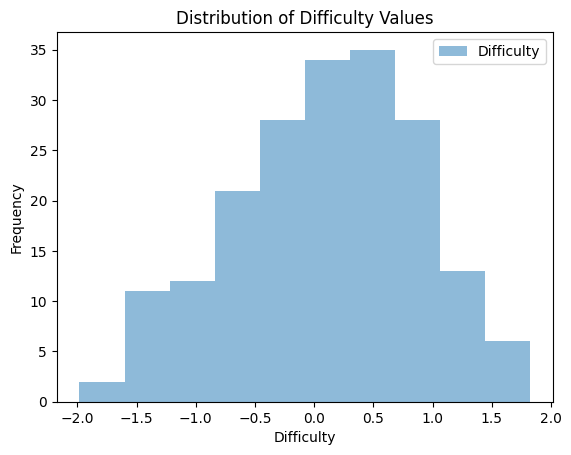

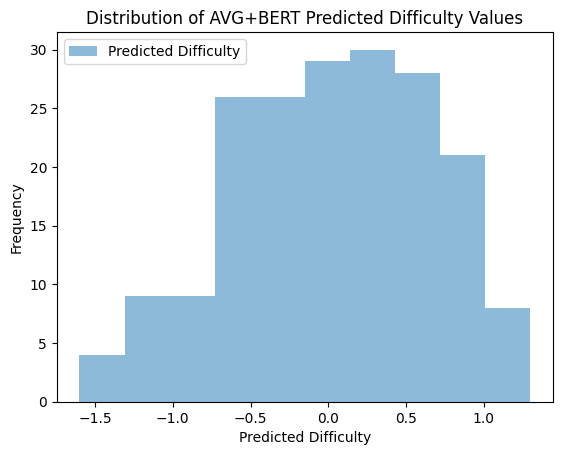

In [5]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df' and contains the columns 'difficulty' and 'predicted_difficulty'
df = results_avgbert_MSE
# Filter the DataFrame for split=test
df_test = df[df['split'] == 'test']

# Plot the distribution of difficulty values
plt.hist(df_test['difficulty'], bins=10, alpha=0.5, label='Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Difficulty Values')
plt.legend()
plt.show()

# Plot the distribution of predicted_difficulty values
plt.hist(df_test['predicted_difficulty'], bins=10, alpha=0.5, label='Predicted Difficulty')
plt.xlabel('Predicted Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of AVG+BERT Predicted Difficulty Values')
plt.legend()
plt.show()

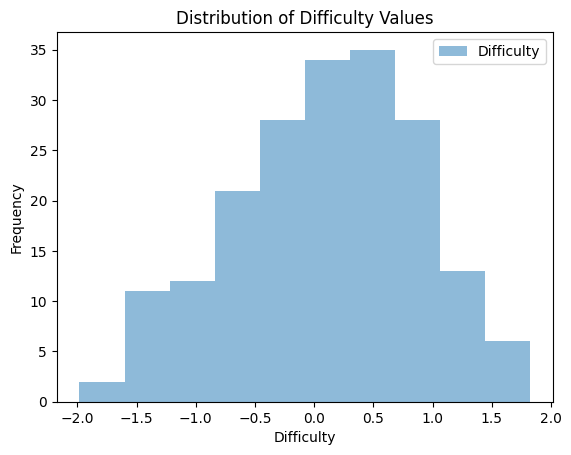

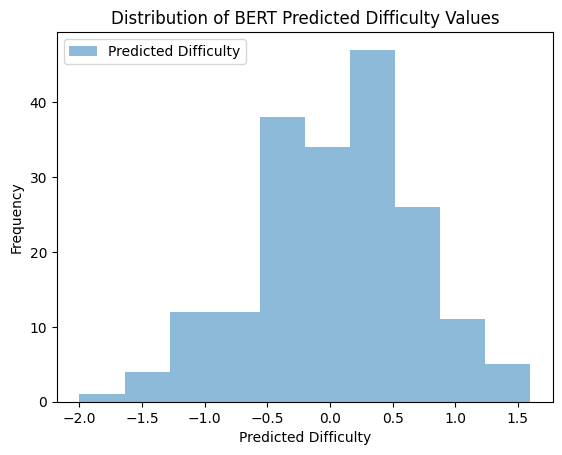

In [6]:
# Assuming your DataFrame is called 'df' and contains the columns 'difficulty' and 'predicted_difficulty'
df = results_bert_MSE
# Filter the DataFrame for split=test
df_test = df[df['split'] == 'test']

# Plot the distribution of difficulty values
plt.hist(df_test['difficulty'], bins=10, alpha=0.5, label='Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Difficulty Values')
plt.legend()
plt.show()

# Plot the distribution of predicted_difficulty values
plt.hist(df_test['predicted_difficulty'], bins=10, alpha=0.5, label='Predicted Difficulty')
plt.xlabel('Predicted Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of BERT Predicted Difficulty Values')
plt.legend()
plt.show()

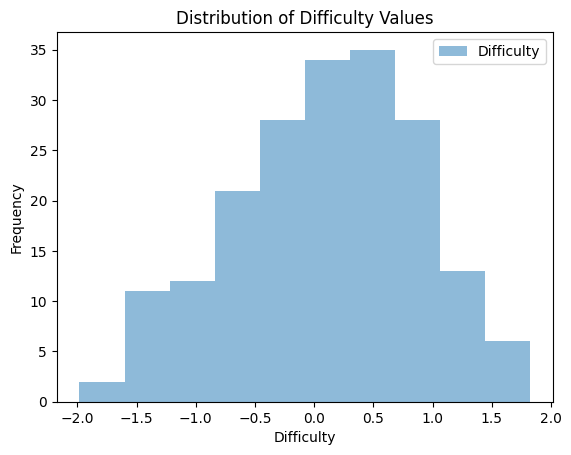

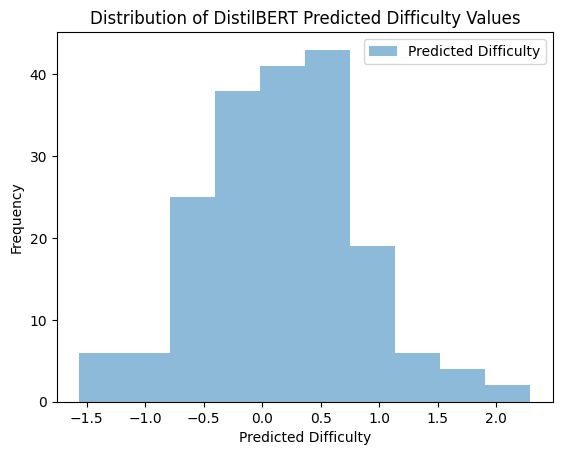

In [7]:
# Assuming your DataFrame is called 'df' and contains the columns 'difficulty' and 'predicted_difficulty'
df = results_distilbert_MSE
# Filter the DataFrame for split=test
df_test = df[df['split'] == 'test']

# Plot the distribution of difficulty values
plt.hist(df_test['difficulty'], bins=10, alpha=0.5, label='Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Difficulty Values')
plt.legend()
plt.show()

# Plot the distribution of predicted_difficulty values
plt.hist(df_test['predicted_difficulty'], bins=10, alpha=0.5, label='Predicted Difficulty')
plt.xlabel('Predicted Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of DistilBERT Predicted Difficulty Values')
plt.legend()
plt.show()

# Data Preporcessing for Digits and Question Mark Tests

In [ ]:
def count_digits(string):
    return sum(item.isdigit() for item in string)/len(string)

def cloze(string):
    if '__' in string:
        return 1
    return 0

def q_mark(string):
    if '?' in string:
        return 1
    return 0

In [ ]:
results_bert_MSE.predicted_difficulty = results_bert_MSE.predicted_difficulty.clip(-5, 5)

results_bert_MSE['MAE'] = (results_bert_MSE['predicted_difficulty']-results_bert_MSE['difficulty']).abs()
results_bert_MSE['totalwords'] = results_bert_MSE['question'].str.split().str.len()
results_bert_MSE['digits'] = results_bert_MSE['question'].apply(count_digits)
results_bert_MSE['cloze'] = results_bert_MSE['question'].apply(cloze)
results_bert_MSE['question_mark'] = results_bert_MSE['question'].apply(q_mark)


df_test_b = results_bert_MSE[results_bert_MSE['split']=='test']
df_train_b = results_bert_MSE[results_bert_MSE['split']=='train']
df_train_b.dropna(inplace=True)

<ipython-input-10-0b876bbd523c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_b.dropna(inplace=True)


In [ ]:
results_distilbert_MSE.predicted_difficulty = results_distilbert_MSE.predicted_difficulty.clip(-5, 5)

results_distilbert_MSE['MAE'] = (results_distilbert_MSE['predicted_difficulty']-results_distilbert_MSE['difficulty']).abs()
results_distilbert_MSE['totalwords'] = results_distilbert_MSE['question'].str.split().str.len()
results_distilbert_MSE['digits'] = results_distilbert_MSE['question'].apply(count_digits)
results_distilbert_MSE['cloze'] = results_distilbert_MSE['question'].apply(cloze)
results_distilbert_MSE['question_mark'] = results_distilbert_MSE['question'].apply(q_mark)


df_test_db = results_distilbert_MSE[results_distilbert_MSE['split']=='test']
df_train_db = results_distilbert_MSE[results_distilbert_MSE['split']=='train']
df_train_db.dropna(inplace=True)

<ipython-input-13-e561e855dbee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_db.dropna(inplace=True)


In [ ]:
results_avgbert_MSE.predicted_difficulty = results_avgbert_MSE.predicted_difficulty.clip(-5, 5)

results_avgbert_MSE['MAE'] = (results_avgbert_MSE['predicted_difficulty']-results_avgbert_MSE['difficulty']).abs()
results_avgbert_MSE['totalwords'] = results_avgbert_MSE['question'].str.split().str.len()
results_avgbert_MSE['digits'] = results_avgbert_MSE['question'].apply(count_digits)
results_avgbert_MSE['cloze'] = results_avgbert_MSE['question'].apply(cloze)
results_avgbert_MSE['question_mark'] = results_avgbert_MSE['question'].apply(q_mark)


df_test_ab = results_avgbert_MSE[results_distilbert_MSE['split']=='test']
df_train_ab = results_avgbert_MSE[results_distilbert_MSE['split']=='train']
df_train_ab.dropna(inplace=True)

<ipython-input-14-113adec96330>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_ab.dropna(inplace=True)


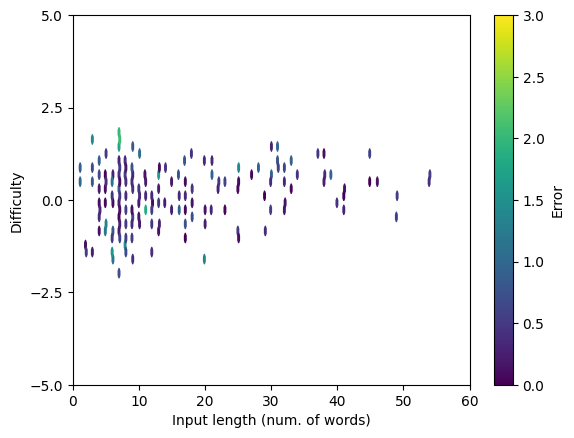

In [ ]:
df = df_test_b
hb =plt.hexbin(df.totalwords, df.difficulty, C=df.MAE,gridsize=(230,10),vmax=3,vmin=0)
plt.xlabel("Input length (num. of words)")
plt.ylabel("Difficulty")
plt.yticks([-5,-2.5,0,2.5,5]);
plt.xlim([0, 60])
cb = plt.colorbar(hb)
cb.set_label('Error')

# Digits Test

In [ ]:
# BERT
print('BERT:')
df_test_q0 = df_test_b[df_test_b['digits']==0]
df_test_q1 = df_test_b[df_test_b['digits']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))


# Distil-BERT
print('DistilBERT')
df_test_q0 = df_test_db[df_test_db['digits']==0]
df_test_q1 = df_test_db[df_test_db['digits']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))


# N2V-BERT
print('N2V-BERT')
df_test_q0 = df_test_ab[df_test_db['digits']==0]
df_test_q1 = df_test_ab[df_test_db['digits']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

#Question Mark Test

In [ ]:
# BERT
print('BERT:')
df_test_q0 = df_test_b[df_test_b['question_mark']==0]
df_test_q1 = df_test_b[df_test_b['question_mark']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))


# Distil-BERT
print('DistilBERT')
df_test_q0 = df_test_db[df_test_db['question_mark']==0]
df_test_q1 = df_test_db[df_test_db['question_mark']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))


# N2V-BERT
print('N2V-BERT')
df_test_q0 = df_test_ab[df_test_db['question_mark']==0]
df_test_q1 = df_test_ab[df_test_db['question_mark']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))